## Twitter Sentiment Analysis using Python


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from wordcloud import WordCloud
import nltk

In [2]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_csv('Sentiment Analysis.csv')

In [4]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
data.shape

(31962, 3)

In [7]:
data.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [8]:
def pattern_remove(in_text, in_pattern):
    a = re.findall(in_pattern,in_text)
    for characters in a:
        in_text = re.sub(characters,"", in_text)
        
    return in_text

In [9]:
data['new_tweet'] = np.vectorize(pattern_remove)(data['tweet'],"@[\w]*")

In [10]:
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [11]:
data['new_tweet'] = data['new_tweet'].str.replace("[^a-zA-Z#]"," ")

In [12]:
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [13]:
data['new_tweet'] = data['new_tweet'].apply(lambda b: " ".join([c for c in b.split() if len(c)>3]))

In [14]:
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: society #motivation


In [15]:
used_words = data['new_tweet'].apply(lambda b: b.split())

In [16]:
used_words.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, can't, cause, they, do...
2                              [bihday, your, majesty]
3    [#model, love, take, with, time, urð±!!!, ð...
4                  [factsguide:, society, #motivation]
Name: new_tweet, dtype: object

In [17]:
for i in range(len(used_words)):
    used_words[i] = " ".join(used_words[i])
    
data['new_tweet'] = used_words

In [18]:
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: society #motivation


In [19]:
freq_words = ''.join([words for words in data['new_tweet']])

<function matplotlib.pyplot.show(close=None, block=None)>

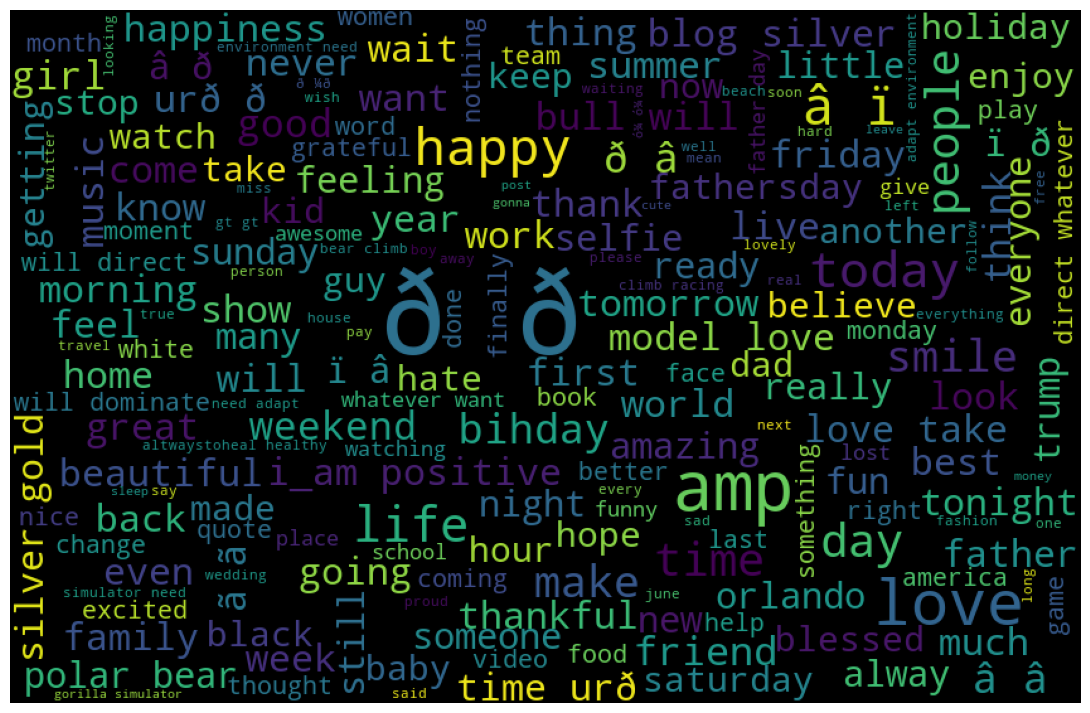

In [20]:
cloud_word = WordCloud(width=850, height= 550, random_state=50,
                       max_font_size=90).generate(freq_words)
plt.figure(figsize=(16,9))
plt.imshow(cloud_word)
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

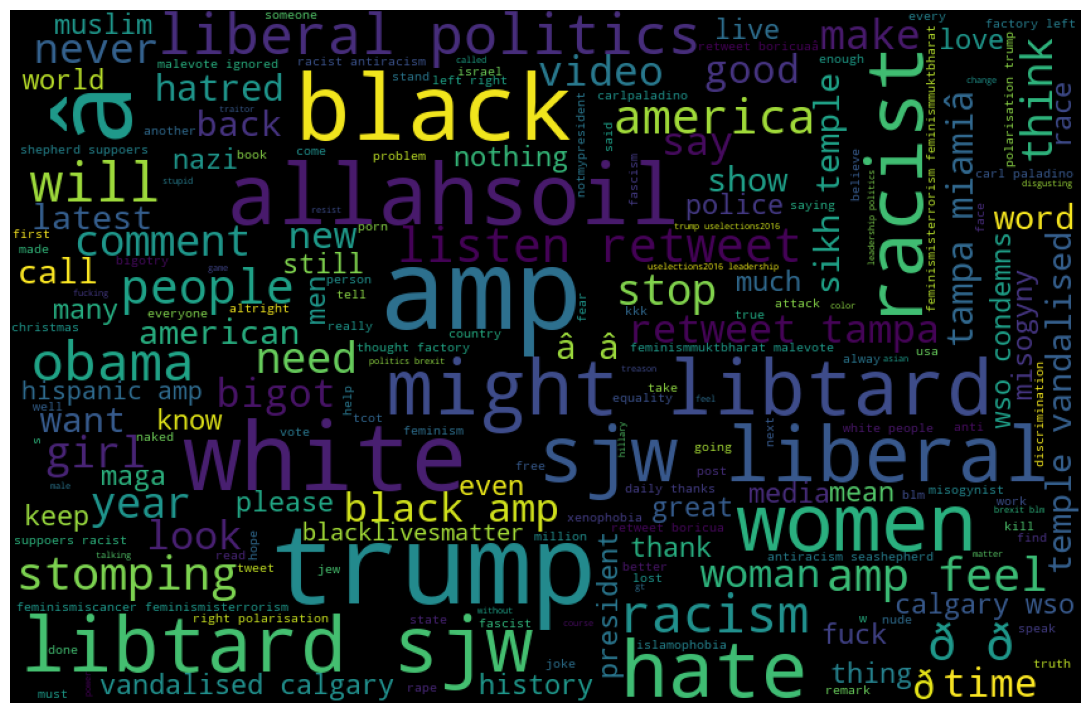

In [21]:
freq_words = " ".join([words for words in data['new_tweet'][data['label']==1]])


cloud_word = WordCloud(width=850, height= 550, random_state=50,
                       max_font_size=90).generate(freq_words)
plt.figure(figsize=(16,9))
plt.imshow(cloud_word)
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

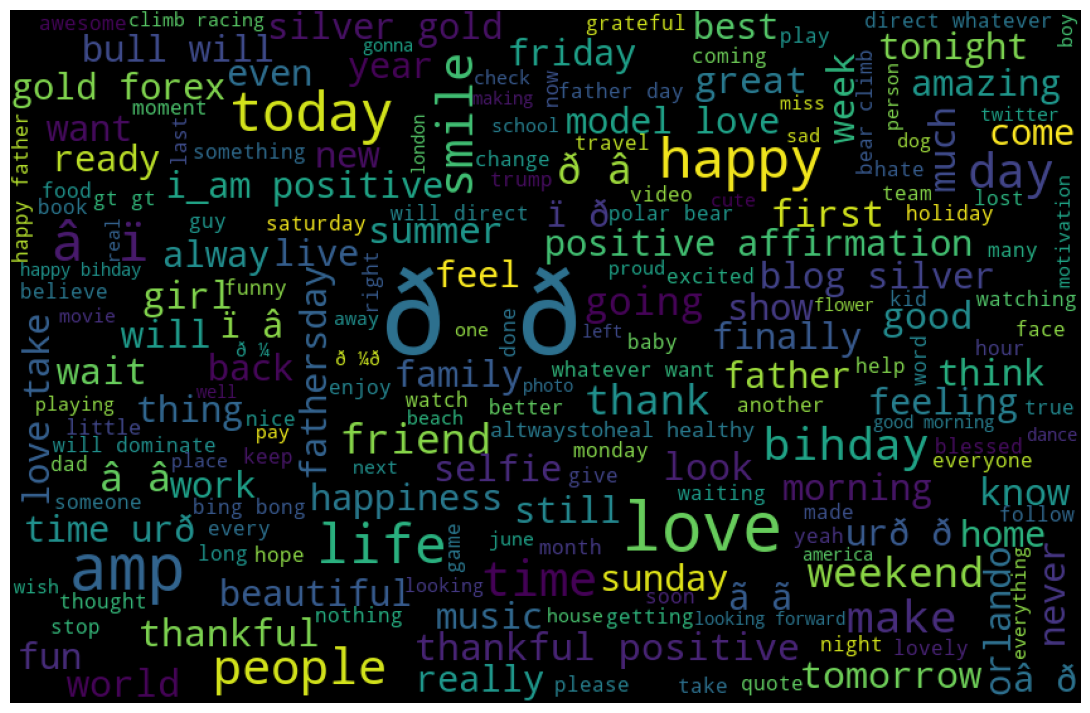

In [22]:
freq_words = " ".join([words for words in data['new_tweet'][data['label']==0]])



cloud_word = WordCloud(width=850, height= 550, random_state=50,
                       max_font_size=90).generate(freq_words)
plt.figure(figsize=(16,9))
plt.imshow(cloud_word)
plt.axis('off')
plt.show

In [23]:
def get_hashtag(tweets):
    hash_tag = []
    for tweet in tweets:
        d = re.findall(r"#(\w+)", tweet)
        hash_tag.append(d)
        
    return hash_tag
        

In [24]:
hashtag_negative  = get_hashtag(data['new_tweet'][data['label']==1])
hashtag_positive = get_hashtag(data['new_tweet'][data['label']==0])

In [25]:
hashtag_negative[1:10]

[['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphins',
  'thecove',
  'helpcovedolphins'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peace'],
 [],
 ['race', 'identity', 'medâ'],
 ['altright', 'whitesupremacy'],
 ['linguistics', 'race', 'power', 'raciolinguistics']]

In [26]:
hashtag_positive[1:5]

[['lyft', 'disapointed', 'getthanked'], [], ['model'], ['motivation']]

In [27]:
hashtag_negative = sum(hashtag_negative,[])
hashtag_positive = sum(hashtag_positive,[])

In [28]:
hashtag_negative[1:5]

['michigan', 'tcot', 'australia', 'opkillingbay']

In [29]:
hashtag_positive[1:5]

['lyft', 'disapointed', 'getthanked', 'model']

In [30]:
tweet_count =nltk.FreqDist(hashtag_positive)
e = pd.DataFrame({'name_hashtag':list(tweet_count.keys()),
                  'total_count':list(tweet_count.values())})

In [31]:
e.head()

,name_hashtag,total_count
0,run,33
1,lyft,2
2,disapointed,1
3,getthanked,2
4,model,364


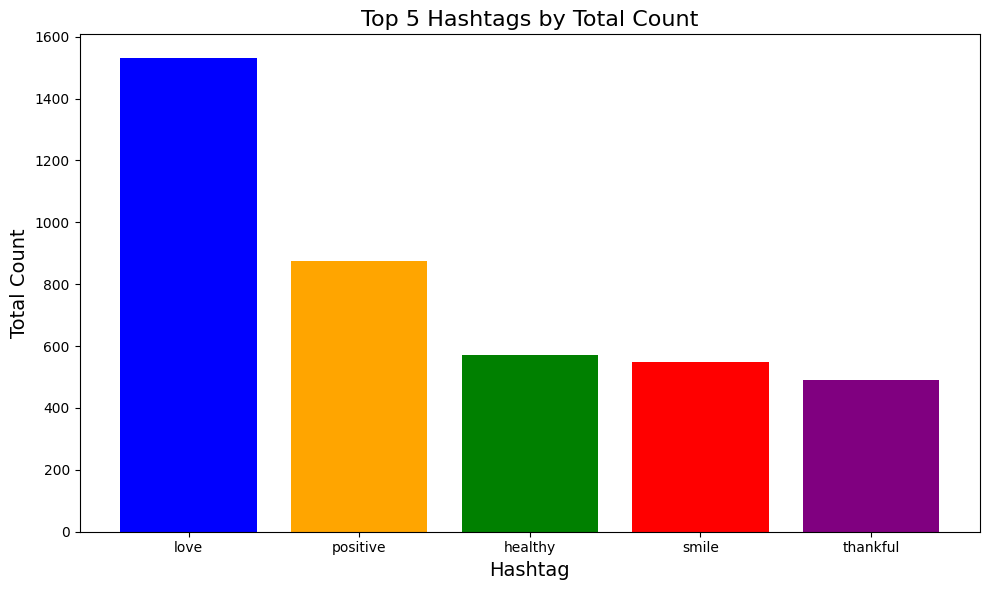

In [32]:
# Sort by 'total_count' and select top 5
e = e.nlargest(columns='total_count', n=5)

# Plot using matplotlib
plt.figure(figsize=(10, 6))
bars = plt.bar(e['name_hashtag'], e['total_count'], color=['blue', 'orange', 'green', 'red', 'purple'])

# Add title and labels
plt.title('Top 5 Hashtags by Total Count', fontsize=16)
plt.xlabel('Hashtag', fontsize=14)
plt.ylabel('Total Count', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


In [38]:
hashtag_negative[1:10]

['michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphins',
 'thecove',
 'helpcovedolphins',
 'neverump']

In [39]:
tweet_count =nltk.FreqDist(hashtag_negative)
e = pd.DataFrame({'name_hashtag':list(tweet_count.keys()),
                  'total_count':list(tweet_count.values())})

In [40]:
e.head()

,name_hashtag,total_count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2


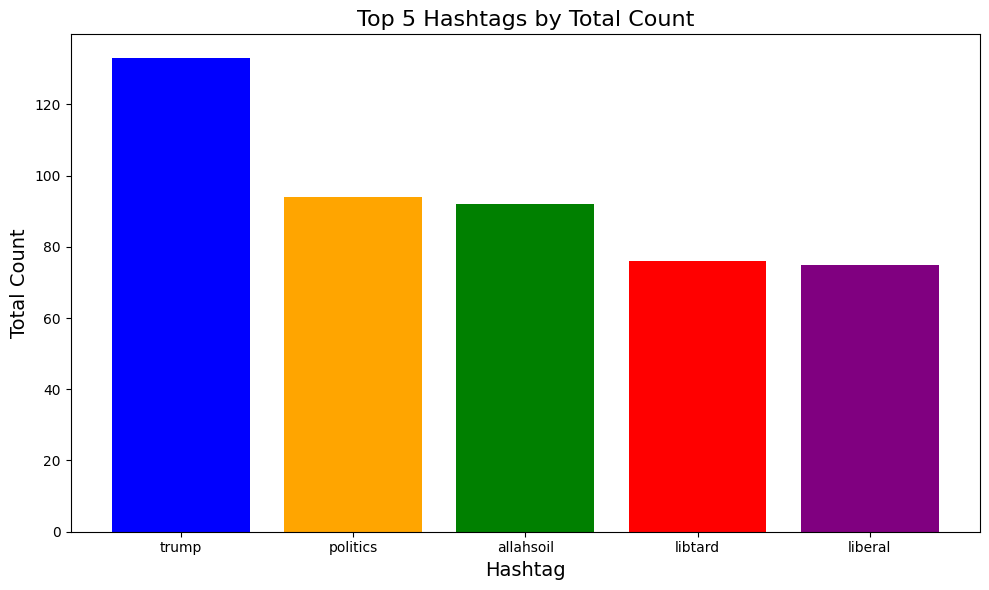

In [37]:
# Sort by 'total_count' and select top 5
e = e.nlargest(columns='total_count', n=5)

# Plot using matplotlib
plt.figure(figsize=(10, 6))
bars = plt.bar(e['name_hashtag'], e['total_count'], color=['blue', 'orange', 'green', 'red', 'purple'])

# Add title and labels
plt.title('Top 5 Hashtags by Total Count', fontsize=16)
plt.xlabel('Hashtag', fontsize=14)
plt.ylabel('Total Count', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()
